In [1]:
from sklearn.datasets import load_iris

In [ ]:
# 데이터 준비
iris = load_iris()
iris.data, iris.target, iris.target_names, iris.DESCR

In [16]:
print(iris.DESCR)
#속성 4개중에서 2개만뽑아서 분류 모델을 적용해 봅시다
# 'sepal length','sepal width' ,'petal length' ,'petal width' 

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [13]:
# 적합한 2개의 속성을 선택 - 시각화를 통해 모양을 보고 선택
import seaborn as sns
import pandas as pd

In [20]:
iris_data = pd.DataFrame(iris.data,columns=['sepal length','sepal width' ,'petal length' ,'petal width' ])
iris_target = pd.DataFrame(iris.target,columns=['target'])
iris_df = pd.concat( (iris_data,iris_target), axis=1 )
iris_df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


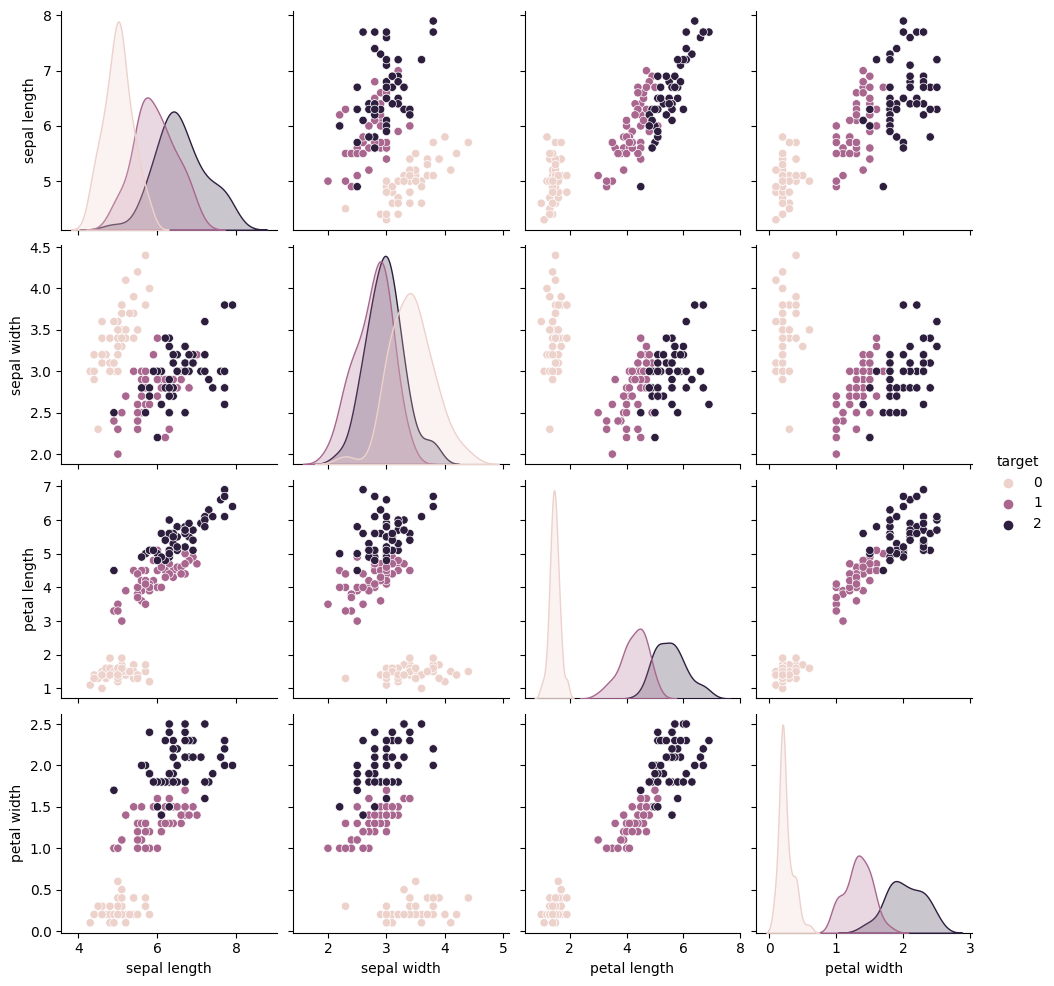

In [22]:
sns.pairplot(iris_df, hue='target')

In [25]:
data = iris_df.loc[:, ['petal length', 'petal width']]
target = iris_df.loc[:, ['target']]

In [27]:
ndata = data.to_numpy()
ntarget = target.to_numpy()

In [36]:
# 모델 선택
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [ ]:
# 데이터 준비(생략)

In [30]:
# 전처리(스케일링)  평균 표준편차
import numpy as np
mean = np.mean(ndata,axis=0)
std = np.std(ndata,axis=0)
ndata_scaled = (ndata-mean) / std

In [45]:
# 학습용 테스트용 데이터 분리
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ndata_scaled, ntarget,random_state=45)  # 실행할때마다 같은값을 가지고 테스트 하기 위함

In [46]:
x_train.shape,y_train.shape

((112, 2), (112, 1))

In [47]:
# 학습
kn.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [48]:
kn.score(x_test,y_test)

0.9473684210526315

In [49]:
# 임의의 값(length,width)으로 어느분류에 속하는지?  모델로 확인해 보고, 시각적으로도 확인

<Axes: xlabel='petal length', ylabel='petal width'>

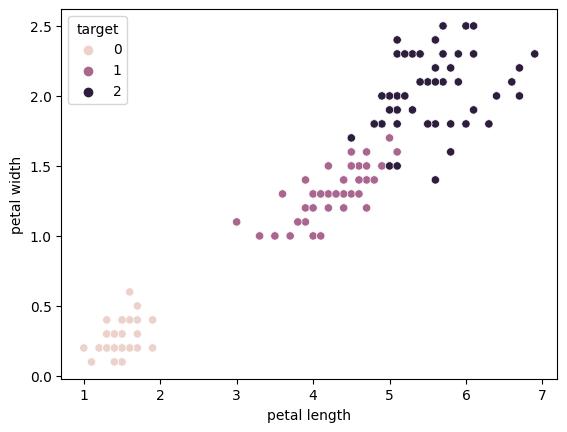

In [56]:
# 원본으로 그린 그림
sns.scatterplot(data = pd.concat([data,target],axis=1),x='petal length',y='petal width', hue='target')

[[106  89  25  44  23]]
[[[0.64908342 1.05393502]
  [0.42173371 0.65903847]
  [0.76275827 1.44883158]
  [0.76275827 1.58046376]
  [0.59224599 0.79067065]]]


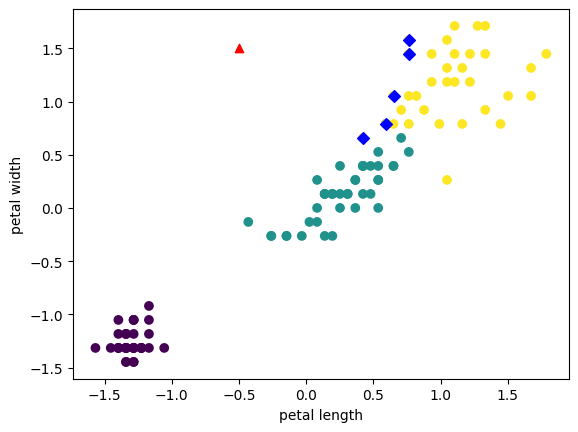

In [77]:
# 테스트와 가장 가까운 5개
distance, indexes = kn.kneighbors([[-0.5,1.5]])
print(indexes)
print(x_train[indexes])
# 스케일링한(전처리) 데이터로 시각화
import matplotlib.pyplot as plt
plt.scatter(x_train[:,0], x_train[:,1],c=y_train )
plt.scatter(-0.5,1.5,marker='^',c='red')
plt.scatter(x_train[indexes,0],x_train[indexes,1],marker='D',c='blue')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [78]:
# 특정 포인트에서의 테스트
test = np.array([[-0.5,1.5]])
kn.predict(test)

array([2])